In [134]:
# 导入所需第三方包
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 一、读取数据
adults = pd.read_csv('/Users/fangcheng/年收入大于50K预测项目/adult.csv')
adults

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [45]:
# 二、查看数据基本信息，并提取所需原始的数据集
adults.info()
adults.describe()
adults.shape
adults.head
adults.income.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<=50K    24720
>50K      7841
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

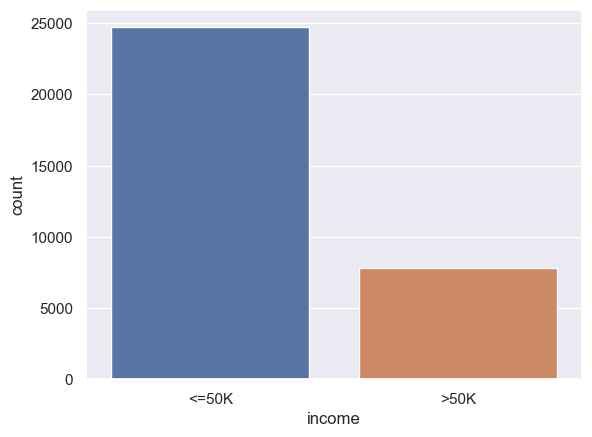

In [46]:
sns.set()
sns.countplot(adults.income)

In [54]:
# 三、样本均衡处理，获取正负样本数据
negative = adults.loc[adults.income == "<=50K"].iloc[:7841].copy()
positive = adults.loc[adults.income == ">50K"].copy()
my_adults = pd.concat((negative,positive),ignore_index=True)
my_adults

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15677,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
15678,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
15679,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
15680,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


<AxesSubplot:xlabel='income', ylabel='count'>

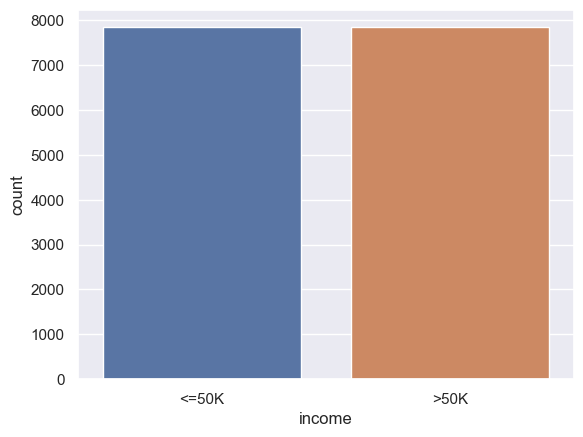

In [55]:
sns.set()
sns.countplot(my_adults.income)

In [99]:
# 数据提取，原始数据集
samples = my_adults[['age','education','occupation','hours.per.week']].copy()
income = my_adults.income.copy()
income.shape
samples.shape

(15682, 4)

In [100]:
# 四、数值化处理
# 映射
target = income.map({"<=50K": 0, ">50K": 1})
print(target)
# 对education做数值化处理
unique_array = samples.education.unique()
def map_function(x):
    return np.argwhere(x == unique_array)[0, 0]
samples.education = samples.education.map(map_function)
print(samples.education)

# 对occupation做数值化处理
unique_array = samples.occupation.unique()
def map_function(x):
    return np.argwhere(x == unique_array)[0, 0]
samples.occupation = samples.occupation.map(map_function)
print(samples.occupation)

0        0
1        0
2        0
3        0
4        0
        ..
15677    1
15678    1
15679    1
15680    1
15681    1
Name: income, Length: 15682, dtype: int64
0         0
1         0
2         1
3         2
4         1
         ..
15677     9
15678    13
15679     8
15680    10
15681     0
Name: education, Length: 15682, dtype: int64
0        0
1        1
2        0
3        2
4        3
        ..
15677    1
15678    0
15679    5
15680    1
15681    2
Name: occupation, Length: 15682, dtype: int64


In [101]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15682 entries, 0 to 15681
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             15682 non-null  int64
 1   education       15682 non-null  int64
 2   occupation      15682 non-null  int64
 3   hours.per.week  15682 non-null  int64
dtypes: int64(4)
memory usage: 490.2 KB


In [102]:
train = samples.copy()
train
target

0        0
1        0
2        0
3        0
4        0
        ..
15677    1
15678    1
15679    1
15680    1
15681    1
Name: income, Length: 15682, dtype: int64

In [103]:
# 五、选择算法模型，构造base model
from sklearn.neighbors import KNeighborsClassifier

In [109]:
base_model = KNeighborsClassifier()

In [110]:
# 合理拆分样本集的函数
from sklearn.model_selection import train_test_split

In [121]:
# 用函数实现多次拆分
def many_predict(train, target, base_model, count):
    train_scores = []
    test_scores = []
    for i in range(count):
        X_train, X_test, y_train, y_test = train_test_split(train, target, train_size=0.2, random_state=i)
        base_model.fit(X_train, y_train)
        train_scores.append(base_model.score(X_train, y_train))
        test_scores.append(base_model.score(X_test, y_test))
    return np.array(train_scores), np.array(test_scores)
# train_scores, test_scores = many_predict(train, target, base_model, 10)

In [122]:
train_scores, test_scorese = many_predict(train, target, base_model, 10)

In [124]:
print("训练集评分{},方差{}".format(train_scores.mean(),train_scores.std()))
print("测试集评分{},方差{}".format(test_scores.mean(),test_scores.std()))

训练集评分0.7860969387755102,方差0.007985702404195901
测试集评分0.6822094691535151,方差0.003277873594764827


In [127]:
# 模型调优
np.sqrt(train.shape[0]*0.8)

112.0071426293877

In [128]:
k_list = np.arange(3,111,step=14)
k_list

array([  3,  17,  31,  45,  59,  73,  87, 101])

In [135]:
train_mean_scores = []
test_mean_scores = []
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    train_scores,test_scores = many_predict(train, target, model, 10)
    train_mean_scores.append(train_scores.mean())
    test_mean_scores.append(test_scores.mean())
    
    
resutl = DataFrame(data={
    "K":k_list,
    "TRAIN":train_mean_scores,
    "TEST":test_mean_scores
})

<AxesSubplot:xlabel='K'>

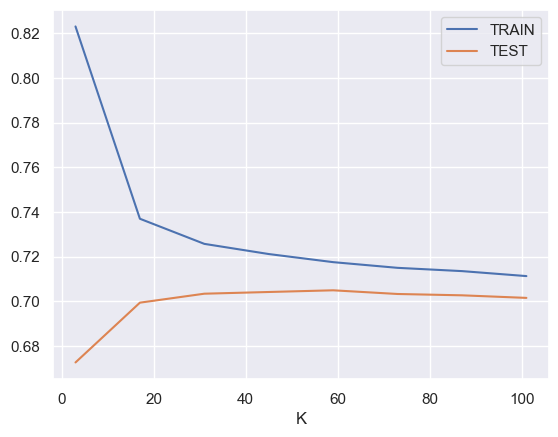

In [136]:
resutl.set_index("K").plot()

In [ ]:
# 应当原则训练集和测试集相近的点或区间